## Цели практической работы

* Изучить и предобработать данные в задаче оттока.

* Научиться применять для решения задачи решающие деревья и оценивать результаты модели.

## Что входит в практическую работу

*  Загрузка и предобработка данных.
*  Применение и настройка линейных моделей.
*  Применение и настройка решающего дерева.
*  Сравнение моделей.
*  Оценка важности признаков.

## Что оценивается

Выполнены все задания ноутбука (заполнены пустые ячейки, даны ответы на вопросы).

## Что нужно сделать
Решите задачу классификации оттоковых клиентов телекома: для каждого клиента необходимо определить, перестанет он пользоваться услугами оператора в ближайшее время или нет.

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("telecom_churn.csv")
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


Сделайте первичную обработку данных:

1. Выбросите колонку State.

2. Колонки International plan и Voice mail plan закодируйте следующим образом: Yes замените на 1, а No на 0.

3. Переведите целевую переменную (Churn) в числа: True в 1, а False в 0.

In [2]:
df = df.drop('State', axis=1)
df['International plan'] = df['International plan'].apply(lambda x: 1 if x == 'Yes' else 0)
df['Voice mail plan'] = df['Voice mail plan'].apply(lambda x: 1 if x == 'Yes' else 0)
df['Churn'] = df['Churn'].astype(int)

Выведите на экран первые строки изменённой таблицы, чтобы проверить, что все преобразования сработали.

In [3]:
df.head()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


Создайте матрицу объект-признак X и вектор с целевой переменной (Churn) y.

In [4]:
x = df.drop('Churn', axis=1)
y = df['Churn']

Проверьте баланс классов. Является ли выборка сбалансированной?

In [5]:
y.value_counts()

Churn
0    2850
1     483
Name: count, dtype: int64

Нет, выборка не является сбалансированной.

Разбейте данные на тренировочную и тестовую части, размер тестовой части — 30%.

In [6]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

Для линейных моделей очень важно масштабирование признаков. Поэтому отмасштабируйте признаки при помощи [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html), обучив метод на тренировочных данных и применив его и к трейну, и к тесту.

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

После масштабирования признаков X_train и X_test перестали быть объектами типа pd.DataFrame, это неудобно. Приведите их снова к pd.DataFrame.

In [8]:
x_train = pd.DataFrame(x_train, columns=scaler.get_feature_names_out())
x_test = pd.DataFrame(x_test, columns=scaler.get_feature_names_out())

Обучите на тренировочных данных с параметрами по умолчанию:

1) логистическую регрессию;

2) метод опорных векторов (с kernel='linear').

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

lgr = LogisticRegression()
svc = SVC(kernel='linear', probability=True)

lgr.fit(x_train, y_train)
svc.fit(x_train, y_train)

SVC(kernel='linear', probability=True)

С помощью обученных моделей сделайте предсказание на тестовых данных. Вычислите значение метрики roc-auc на тесте. 

Не забудьте, что для корректного вычисления roc-auc необходимо предсказывать не сами классы, а их вероятности (чтобы SVC мог это сделать, при объявлении модели поставьте probability=True).

In [12]:
from sklearn.metrics import roc_auc_score

lgr_score = lgr.predict_proba(x_test)[:, 1]
svc_score = svc.predict_proba(x_test)[:, 1]
roc_auc_score(y_test, lgr_score), roc_auc_score(y_test, svc_score)

(0.797541807954859, 0.7846367447200491)

Теперь обучите решающее дерево с параметрами по умолчанию на тренировочных данных, сделайте предсказание на тесте и вычислите на тесте roc-auc.

In [13]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

dtc_score = dtc.predict_proba(x_test)[:, 1]
roc_auc_score(y_test, dtc_score)

0.8395144136206267

Нужно ли масшабировать признаки для обучения решающего дерева? Проверьте это, заново разбив данные на тренировочную и тестовую части (назовите новые полученные объекты новыми названиями), и проведите обучение, предсказание и оценку метрики до масштабирования и после.

In [14]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(x, y, test_size=0.3)

In [15]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train2, y_train2)

dtc_score = dtc.predict_proba(x_test2)[:, 1]
roc_auc_score(y_test2, dtc_score)

0.8437244719337145

Какой вывод про масштабирование признаков для обучения дерева можно сделать?

Масштабирование признаков повлекло небольшое снижение метрики roc_auc.

Теперь ваша цель — максимально улучшить модели. Для этого:

1) у линейных моделей подберите гиперпараметр С (переберите 20 значений C в диапазоне от 0.1 до 10 с равным шагом);

2) у решающего дерева подберите max_depth (переберите глубину от 1 до 10 с шагом 1) и criterion — gini или entropy (см. [документацию](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)).

Для подбора параметров используйте [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) с пятью фолдами и метрикой roc-auc или обычные циклы.

Подбор параметров осуществляется только по тренировочным данным!

После подбора гиперпараметров обучите модели с найденными гиперпараметрами на тренировочных данных, сделайте предсказания на тесте и оцените их качество (roc_auc).

In [16]:
best_с_lgr, best_с_svc = 0.1, 0.1
best_auc_lgr, best_auc_svc = 0., 0.
for c in np.arange(0.1, 10, 0.1):
    lgr = LogisticRegression(C=c)
    svc = SVC(C=c, kernel='linear', probability=True)

    lgr.fit(x_train, y_train)
    svc.fit(x_train, y_train)
    lgr_score = lgr.predict_proba(x_test)[:, 1]
    svc_score = svc.predict_proba(x_test)[:, 1]
    lgr_score, svc_score = roc_auc_score(y_test, lgr_score), roc_auc_score(y_test, svc_score)
    if lgr_score > best_auc_lgr:
        best_auc_lgr = lgr_score
        best_с_lgr = c

    if svc_score > best_auc_svc:
        best_auc_svc = svc_score
        best_с_svc = c

best_с_lgr, best_auc_lgr, best_с_svc, best_auc_svc

(8.9, 0.7979423099173186, 0.8, 0.7974706076059773)

In [17]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': np.arange(1, 11),
    'criterion': ['gini', 'entropy']
}

gs = GridSearchCV(
    DecisionTreeClassifier(), 
    param_grid=params, 
    scoring='roc_auc', 
    cv=5, 
    n_jobs=-1
)

gs.fit(x_train2, y_train2)
gs.best_params_, gs.best_score_

({'criterion': 'entropy', 'max_depth': 4}, 0.8601977066141876)

In [18]:
lgr = LogisticRegression(C=2.3)
svc = SVC(C=0.4, kernel='linear', probability=True)
dtc = DecisionTreeClassifier(criterion='gini', max_depth=5)

lgr.fit(x_train, y_train)
svc.fit(x_train, y_train)
dtc.fit(x_train2, y_train2)

lgr_score = lgr.predict_proba(x_test)[:, 1]
svc_score = svc.predict_proba(x_test)[:, 1]
dtc_score = dtc.predict_proba(x_test2)[:, 1]
roc_auc_score(y_test, lgr_score), roc_auc_score(y_test, svc_score), roc_auc_score(y_test2, dtc_score)

(0.7977465089578939, 0.7727195863259728, 0.873129157427938)

Какая модель справилась с решением задачи лучше всего по метрике roc-auc?

дерево решений

Нарисуйте roc-кривую для наилучшей модели.

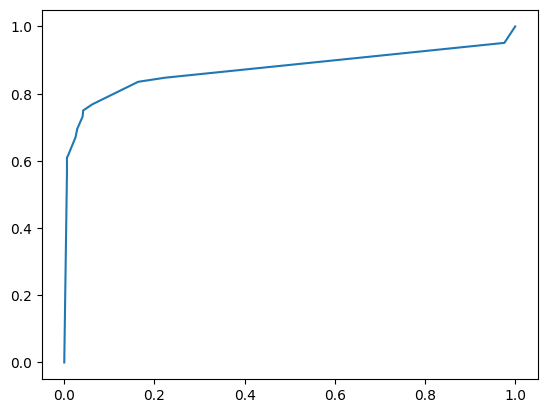

In [19]:
from sklearn.metrics import roc_curve
from matplotlib import pyplot as plt

fpr, tpr, _ = roc_curve(y_test2, dtc_score)
plt.plot(fpr, tpr)

Сравните между собой две лучшие модели:

1. Насколько сильно отличается качество предсказания на тестовых данных?
(Вычислите разность значений roc-auc.)

2. Постройте гистограммы важности признаков (для линейных моделей берите модуль значений весов) для каждой из этих моделей. Сравните между собой списки из трёх самых важных признаков. Совпадают ли они?

In [20]:
roc_auc_score(y_test2, dtc_score) - roc_auc_score(y_test, lgr_score)

0.07538264847004406

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Total day charge'),
  Text(1, 0, 'Customer service calls'),
  Text(2, 0, 'Total intl calls'),
  Text(3, 0, 'Total eve minutes'),
  Text(4, 0, 'Total day minutes'),
  Text(5, 0, 'Total intl minutes'),
  Text(6, 0, 'International plan'),
  Text(7, 0, 'Voice mail plan'),
  Text(8, 0, 'Total eve charge'),
  Text(9, 0, 'Total night minutes')])

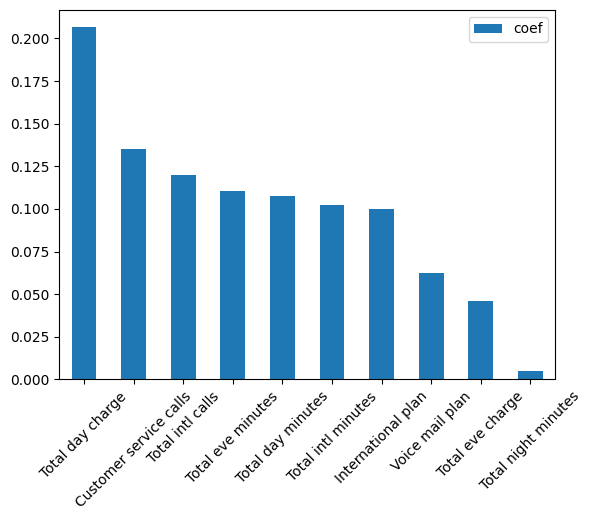

In [21]:
(pd.DataFrame({'coef': dtc.feature_importances_}, index=lgr.feature_names_in_)
 .sort_values('coef', ascending=False, key=lambda x: abs(x)))[:10].plot.bar()
plt.xticks(rotation=45)

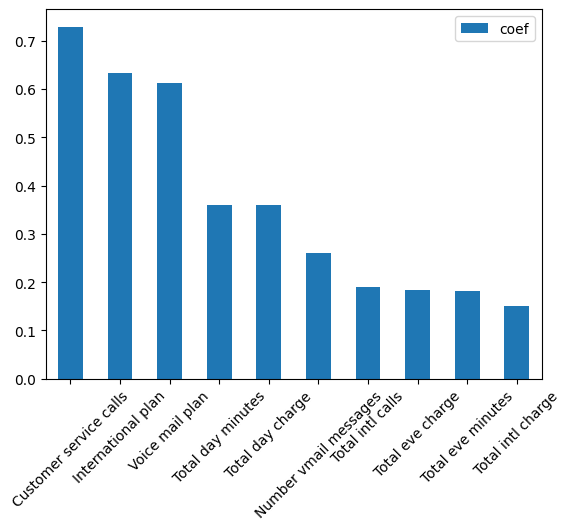

In [ ]:
(pd.DataFrame({'coef': np.abs(lgr.coef_[0])}, index=lgr.feature_names_in_)
 .sort_values('coef', ascending=False, key=lambda x: abs(x)))[:10].plot.bar()
plt.xticks(rotation=45)

Сделайте выводы:

1. Являются ли данные сбалансированными? Что это означает?

2. Какая модель после подбора гиперпараметров лучше всего решает задачу с точки зрения метрики roc-auc?

3. Одинаковые ли признаки важны для работы двух наилучших моделей? Почему?

1. да, количественно один класс превосходит остальные

2. дерево решений

3. по важности совпадает только Customer service calls, остальные - ситуативно (например в линейной данные отмасштабированы)